# 05 - Taming Text

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Generating a Wordcloud

In [2]:
from wordcloud import WordCloud

In [3]:
path_emails = 'hillary-clinton-emails/Emails.csv'

emails = pd.read_csv(path_emails)

# concatenate all emails in one string
emails_raw_text = ' '.join(np.array(emails['RawText']))

(-0.5, 399.5, 199.5, -0.5)

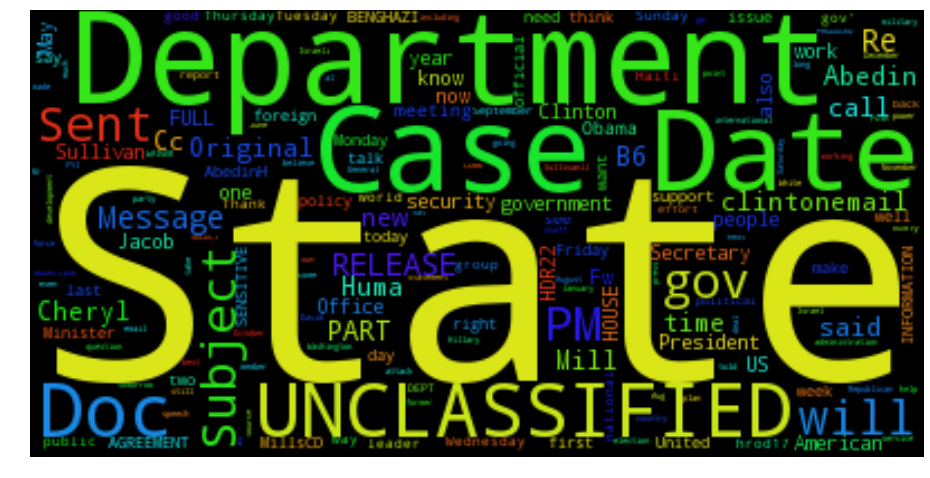

In [4]:
# generate wordcloud on the raw corpus
wordcloud_raw = WordCloud().generate(emails_raw_text)

# display the wordcloud
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud_raw)
plt.axis('off')

### Text Pre-Processing Pipeline

In [2]:
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords

# this line must be used to install the required corpora (only need to be run once)
#import nltk
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/Sym/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# tokenization
tokens = regexp_tokenize(emails_raw_text, pattern='\w+')

# removal of numbers and digits
tokens = [token for token in tokens if token.isdigit() == False]

# normalization
lowercase_tokens = [token.lower() for token in tokens]

# list of English stopwords
stop_words = set(stopwords.words('english'))

# list of words related to emails
stopwords_emails = ['sent', 'from', 'to', 'subject', 'fw', 'fwd', 'fvv', 'cc', 'bcc', 'attachments', 're', 'date', 'html', 'php']

stop_words.update(stopwords_emails)

# stopwords removal
# filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
filtered_tokens = [token for token in lowercase_tokens if token not in stop_words]

# remove tokens that are too short
clean_tokens = [token for token in filtered_tokens if len(token) > 2]

# concatenate all tokens in one string
emails_clean_text = ' '.join(clean_tokens)

(-0.5, 399.5, 199.5, -0.5)

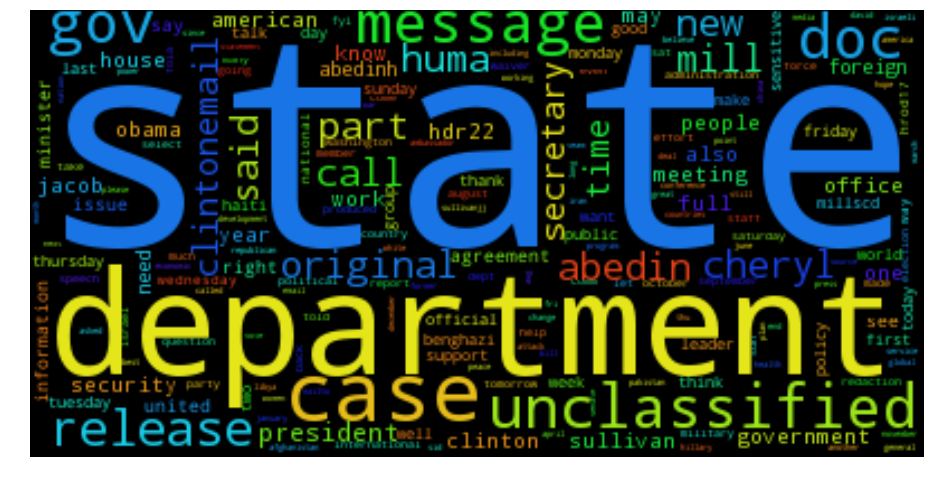

In [7]:
# generate wordcloud after pre-processing the text
wordcloud_clean = WordCloud().generate(emails_clean_text)

# display the wordcloud
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud_clean)
plt.axis('off')